# DM2022 ISA5810 Lab2 Homework Competition - Baseline - TFIDF

## Loading tables

### Loading identification table

In [91]:
import pandas as pd

In [100]:
data_identification = pd.read_csv("../Kaggle/data/data_identification.csv")

In [101]:
data_identification

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


### Loading emotion table

In [94]:
emotion = pd.read_csv("../Kaggle/data/emotion.csv")

In [95]:
emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


### Loading twitter table

In [96]:
import json 

twitter_data = []
with open('../Kaggle/data/tweets_DM.json') as f:
    for line in f.readlines():
        data = json.loads(line)
        twitter_data.append(data['_source']['tweet'])

In [97]:
twitter_data

[{'hashtags': ['Snapchat'],
  'tweet_id': '0x376b20',
  'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'},
 {'hashtags': ['freepress', 'TrumpLegacy', 'CNN'],
  'tweet_id': '0x2d5350',
  'text': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'},
 {'hashtags': ['bibleverse'],
  'tweet_id': '0x28b412',
  'text': 'Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>'},
 {'hashtags': [],
  'tweet_id': '0x1cd5b0',
  'text': 'Now ISSA is stalking Tasha 😂😂😂 <LH>'},
 {'hashtags': [],
  'tweet_id': '0x2de201',
  'text': '"Trust is not the same as faith. A friend is someone you trust. Putting faith in anyone is a mistake." ~ Christopher Hitchens <LH> <LH>'},
 {'hashtags': ['authentic', 'LaughOutLoud'],
  'tweet_id': '0x1d755c',
  'text': '@RISKshow @TheKevinAllison Thx for the BEST TIME tonight. What stories! H

In [104]:
df_twitter = pd.DataFrame(twitter_data)

In [105]:
df_twitter

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


### Join all tables

In [106]:
df_temp = df_twitter.join(data_identification.set_index('tweet_id'), on='tweet_id')
df_all = df_temp.join(emotion.set_index('tweet_id'), on='tweet_id')

In [117]:
df_all

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
...,...,...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test,NaN
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


## Spliting dataset

### Spliting Train and Test set

In [108]:
df_train_tmp = df_all[new_df_all['identification'] == 'train']
df_test = df_all[new_df_all['identification'] == 'test']

In [109]:
df_train_tmp

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation
...,...,...,...,...,...
1867526,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,train,joy
1867527,[],0x38959e,In every circumtance I'd like to be thankful t...,train,joy
1867528,[blessyou],0x2cbca6,there's currently two girls walking around the...,train,joy
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


In [110]:
df_test

,hashtags,tweet_id,text,identification,emotion
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,NaN
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,NaN
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test,NaN
...,...,...,...,...,...
1867525,[],0x2913b4,"""For this is the message that ye heard from th...",test,NaN
1867529,[],0x2a980e,"""There is a lad here, which hath five barley l...",test,NaN
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN


### Spliting Train and Validation set

In [111]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df_train_tmp, test_size=0.25, random_state=42)

In [112]:
df_train

,hashtags,tweet_id,text,identification,emotion
903416,"[TeaserOfTheTeaser, WalkOnWater]",0x1c90bc,Thank you @JaredLeto cos now I'm wide awake th...,train,joy
904223,[],0x349598,@Anjeli30 @deevarg AND WE GOT POLAND SPRING WA...,train,joy
1745902,[futurewife],0x31b920,The girls birthday tomorrow 🎈2 years we will h...,train,joy
882485,[Love],0x2136ec,Someone has to be BOLD ENOUGH.To spread <LH> #...,train,joy
1210296,[],0x1f23b3,I genuinely hate myself when I'm vicious and c...,train,disgust
...,...,...,...,...,...
332048,[],0x1d5c9e,"And above all these things put on charity, whi...",train,joy
1814818,[],0x2cc602,@kylegriffin1 Still a devastating poll for Tru...,train,sadness
168809,[],0x2ec9a9,"@BebeNeuwirth Ohhh, tears! <LH>",train,joy
861169,[],0x2d3f18,Sponsor shirts are completed and Spirit Gear h...,train,joy


In [113]:
df_val

,hashtags,tweet_id,text,identification,emotion
1245305,"[week, since, Mom, miss, She, willbe, BestFrie...",0x2b605f,Been a #week now #since I <LH> my #Mom. I #mis...,train,surprise
1470116,[],0x2eaf42,"Follow our Librarian, Ms. Bird 🐦 for more info...",train,joy
600175,[],0x333365,Wonder if the guys who skate in Foxboro over t...,train,joy
1218751,[],0x28af74,"@vanillablack1 Bloody <LH> puts it mildly, wil...",train,joy
1260993,[],0x3868ce,Beat the Dolphins next week and we are back to...,train,joy
...,...,...,...,...,...
1484163,[],0x2321b6,<LH> wait? Lance got his own place and a Jag? ...,train,fear
1010019,"[righteous, life, wise, wisdom, help, wednesda...",0x2671b1,The fruit of the #righteous is a tree of #life...,train,trust
1365544,[],0x380184,Underneath all the facade @RandiRhodes is a Be...,train,sadness
1857693,"[android, themes, letmeknow]",0x2c5c54,looking for some <LH> #android #themes #letmeknow,train,joy


### Save dataframe for later use

In [124]:
## save to pickle file
df_train.to_pickle("df_train.pkl")
df_val.to_pickle("df_val.pkl")
df_test.to_pickle("df_test.pkl")

### Loading saved dataframe

In [125]:
import pandas as pd

## load a pickle file
df_train = pd.read_pickle("df_train.pkl")
df_val = pd.read_pickle("df_val.pkl")
df_test = pd.read_pickle("df_test.pkl")

## Feature Engineering

In [52]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# use TFIDF vectorizer
tfidf_vecterizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

In [53]:
# apply TFIDF analyzer to training set
tfidf_vecterizer.fit(df_train['text'])

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(max_features=1000,
                tokenizer=<function word_tokenize at 0x7f4d29653640>)

### Save model for later use

In [126]:
import joblib

joblib.dump(tfidf_vecterizer, 'tfidf_vecterizer')

['tfidf_vecterizer']

### Loading saved model

In [127]:
tfidf_vecterizer = joblib.load('tfidf_vecterizer')

### Transform data

In [54]:
# transform to TFIDF features
X_train = tfidf_vecterizer.transform(df_train['text'])
y_train = df_train['emotion']

X_val = tfidf_vecterizer.transform(df_val['text'])
y_val = df_val['emotion']

X_test = tfidf_vecterizer.transform(df_test['text'])
y_test = df_test['emotion']

In [115]:
## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_val.shape: ', X_val.shape)
print('y_val.shape: ', y_val.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1091672, 1000)
y_train.shape:  (1091672,)
X_val.shape:  (363891, 1000)
y_val.shape:  (363891,)
X_test.shape:  (411972, 1000)
y_test.shape:  (411972,)


## Model Training

In [59]:
from sklearn.naive_bayes import MultinomialNB


In [61]:
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train, y_train)

MultinomialNB()

In [73]:
y_train_pred = mnb_tfidf.predict(X_train)

In [62]:
y_val_pred = mnb_tfidf.predict(X_val)

## Evaluation

In [118]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_val = accuracy_score(y_true=y_val, y_pred=y_val_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('validating accuracy: {}'.format(round(acc_val, 2)))

training accuracy: 0.46
validating accuracy: 0.46


In [75]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_val, y_pred=y_val_pred))

              precision    recall  f1-score   support

       anger       0.88      0.04      0.08      9915
anticipation       0.60      0.34      0.43     62409
     disgust       0.55      0.14      0.23     34639
        fear       0.89      0.16      0.27     16032
         joy       0.42      0.92      0.58    128812
     sadness       0.50      0.30      0.38     48482
    surprise       0.88      0.08      0.14     12273
       trust       0.73      0.07      0.12     51329

    accuracy                           0.46    363891
   macro avg       0.68      0.26      0.28    363891
weighted avg       0.57      0.46      0.39    363891



In [63]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_val, y_pred=y_val_pred) 
print(cm)

[[   392    415    474     10   7451   1159      1     13]
 [     2  20970    456     42  38728   1935     27    249]
 [    17   1185   4926     48  23139   5237     18     69]
 [     3    802    344   2532  11426    886      9     30]
 [     9   5718    565     90 119085   2517     34    794]
 [    14   1677   1615     70  30370  14633     19     84]
 [     2    454    397     15   9062   1399    922     22]
 [     5   3669    250     41  42620   1248     14   3482]]


In [71]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(9,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

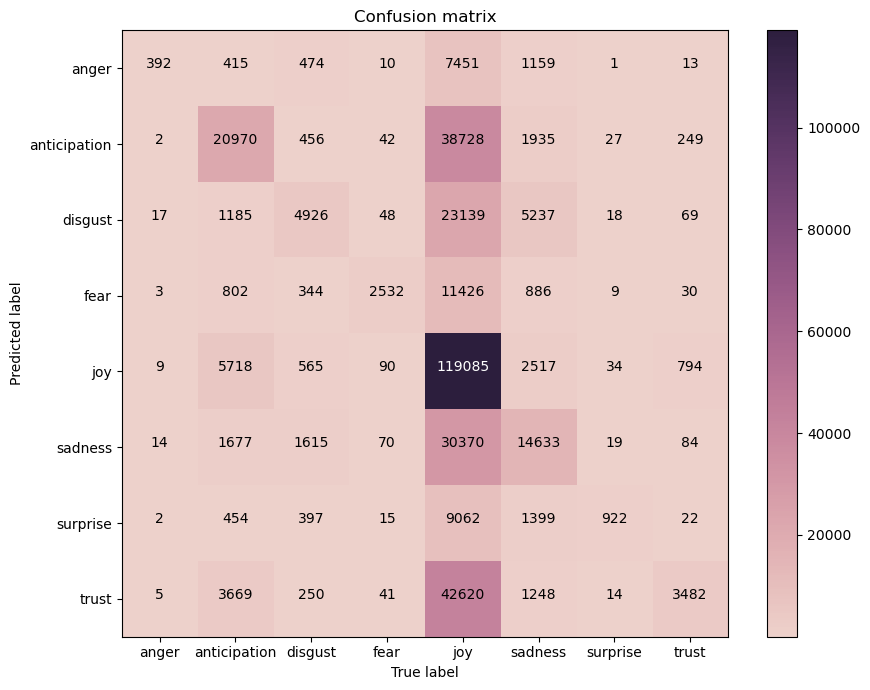

In [72]:
# plot your confusion matrix
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

## Export predicted emotion on test set

In [120]:
y_test_pred = mnb_tfidf.predict(X_test)

In [121]:
df_test['emotion_pred'] = y_test_pred

/tmp/ipykernel_839377/101360180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['emotion_pred'] = y_test_pred


In [122]:
df_test

,hashtags,tweet_id,text,identification,emotion,emotion_pred
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN,joy
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN,anticipation
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,NaN,joy
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,NaN,joy
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test,NaN,anticipation
...,...,...,...,...,...,...
1867525,[],0x2913b4,"""For this is the message that ye heard from th...",test,NaN,joy
1867529,[],0x2a980e,"""There is a lad here, which hath five barley l...",test,NaN,joy
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN,joy
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN,joy


In [123]:
df_test[['tweet_id', 'emotion_pred']].to_csv('prediction.csv', index=False, header=['id', 'emotion'])